In [10]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import math

In [11]:
df = pd.read_csv("car_prices.csv")

In [12]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [13]:
# dropping unused colums
df.drop(['saledate'],axis = 1,inplace = True)
df.drop(['seller'],axis = 1,inplace = True)
df.drop(['state'],axis = 1,inplace = True)
df.drop(['vin'],axis = 1,inplace = True)
df.drop(['transmission'],axis = 1,inplace = True)
df.drop(['trim'],axis = 1,inplace = True)
df.drop(['mmr'],axis = 1,inplace = True)

In [14]:
# Dropping NA values

df = df[df['make'].notna()]
df = df[df['model'].notna()]
df = df[df['body'].notna()]
df = df[df['condition'].notna()]
df = df[df['odometer'].notna()]
df = df[df['interior'].notna()]
df = df[df['color'].notna()]

## Getting mean values of same cars to fill the missing selling prices

In [15]:
def calculate_avg_selling_price(df, model, mileage, year, condition):
    min_year = year - 2
    max_year = year + 2
    min_mileage = math.floor(mileage / 10000) * 10000
    max_mileage = math.ceil(mileage / 10000) * 10000
    min_condition = math.floor(condition / 10) * 10
    max_condition = math.ceil(condition / 10) * 10
    
    filtered_df = df.loc[(df['model'] == model) & 
                         (min_year < df['year']) & (df['year'] < max_year) & 
                         (min_mileage < df['odometer']) & (df['odometer'] < max_mileage) & 
                         (min_condition < df['condition']) & (df['condition'] < max_condition)]
    mean_selling_price = filtered_df['sellingprice'].mean()
    return mean_selling_price

In [16]:
avg_values = []

for index, row in df[df.sellingprice.isna()].iterrows():
    model = row['model']
    mileage = int(row['odometer'])
    year = row['year']
    condition = int(row['condition'])
    
    avg_values.append(calculate_avg_selling_price(df, model, mileage, year, condition))


In [17]:
avg_values = pd.Series(avg_values)

In [18]:
df[df.sellingprice.isna()]

,year,make,model,body,condition,odometer,color,interior,sellingprice
306447,2013,Hyundai,Sonata,Sedan,19.0,37254.0,gray,gray,NaN
406524,2013,Chrysler,300,Sedan,27.0,44208.0,silver,black,NaN
422358,2013,Hyundai,Sonata,Sedan,28.0,44299.0,blue,gray,NaN
429644,2013,Chrysler,200,Sedan,25.0,47344.0,white,black,NaN
429660,2013,Dodge,Avenger,Sedan,34.0,44525.0,gray,black,NaN
429786,2013,Hyundai,Accent,Sedan,3.0,43135.0,silver,gray,NaN
431905,2013,Kia,Soul,Wagon,19.0,29465.0,silver,black,NaN
457035,2014,Hyundai,Elantra,Sedan,19.0,20775.0,white,—,NaN
457803,2013,Dodge,Charger,Sedan,19.0,45355.0,white,black,NaN
522495,2012,Ford,Fusion,sedan,26.0,51648.0,black,gray,NaN


In [19]:
nan_indices = df[df['sellingprice'].isna()].index

In [20]:
avg_values_reset_index = avg_values.reset_index(drop=True)
avg_values_reset_index.index = nan_indices

In [21]:
df['sellingprice'] = df['sellingprice'].fillna(avg_values_reset_index)

In [22]:
df[df.sellingprice.isna()]

,year,make,model,body,condition,odometer,color,interior,sellingprice


In [23]:
df['odometer'] = df['odometer'] * 1.601

## Taking care of duplicate makes

In [25]:
make_mappings = {
    "vw": "Volkswagen",
    "lincoln": "Lincoln",
    "bmw": "BMW",
    "ford": "Ford",
    "mitsubishi": "Mitsubishi",
    "chevrolet": "Chevrolet",
    "Pontiac": "pontiac",
    "landrover": "Land Rover",
    "land rover": "Land Rover",
    "chrysler": "Chrysler",
    "mercedes": "Mercedes-Benz",
    "mazda": "Mazda",
    "gmc truck": "GMC",
    "cadillac": "Cadillac",
    "oldsmobile": "Oldsmobile",
    "lexus": "Lexus",
    "toyota": "Toyota",
    "honda": "Honda",
    "nissan": "Nissan",
    "porsche": "Porsche",
    "kia": "Kia",
    "audi": "Audi",
    "dodge": "Dodge",
    "subaru": "Subaru",
    "plymouth": "Plymouth",
    "hyundai": "Hyundai",
    "jeep":  "Jeep",
    "acura": "Acura",
    "volkswagen": "Volkswagen",
    "suzuki": "Suzuki",
    "dodge tk": "Dodge",
    "gmc": "GMC",
    "maserati": "Maserati",
    "hyundai tk": "Hyundai",
    "mazda tk": "Mazda",
    "ford tk": "Ford",
    "buick": "Buick",
    "mercedes-b": "Mercedes-Benz",
    "mercury": "Mercury",
    "chev truck": "Chevrolet",
    "ford truck": "Ford",

}

# Replace occurrences of make names according to the mappings
for old_make, new_make in make_mappings.items():
    df['make'] = df['make'].replace(old_make, new_make)


In [26]:
body_type_mapping = {
    'Sedan': ['Sedan', 'sedan','G Sedan','g sedan'],
    'SUV': ['suv', 'SUV','Navitgation'],
    'Convertible': ['Convertible','convertible','Q60 Convertible','G37 Convertible','G Convertible','g convertible',
                    'g37 convertible','beetle convertible','q60 convertible','granturismo convertible',
                    'Beetle Convertible','GranTurismo Convertible',],
    'Wagon': ['Wagon', 'wagon','CTS-V Wagon','CTS Wagon','TSX Sport Wagon','cts wagon','tsx sport wagon'],
    'Coupe': ['Coupe','coupe','Koup','CTS Coupe','G Coupe','Elantra Coupe','Genesis Coupe','CTS-V Coupe','G37 Coupe','g coupe',
    'cts-v coupe','Q60 Coupe','cts coupe','koup','g37 coupe','q60 coupe','cts-v coupe','elantra coupe','genesis coupe'],
    'Hatchback': ['Hatchback', 'hatchback'],
    'Minivan': ['Minivan', 'minivan'],
    'Van':['Van','E-Series Van','Ram Van','Transit Van','van','e-series van','promaster cargo van','transit van',
    'Promaster Cargo Van','Promaster Cargo Van'],
    'Pickup':['Double Cab','CrewMax Cab','Access Cab','King Cab','SuperCrew','Extended Cab','SuperCab','Regular Cab','Quad Cab','Club Cab','Xtracab'
    'Mega Cab','cab plus 4','Cab Plus','Crew Cab','regular-cab','Xtracab','Mega Cab','crew cab','king cab','xtracab',
    'Cab Plus 4','club cab','mega cab','access cab','crewmax cab','extended cab','supercab','quad cab','regular cab','double cab',
    'supercrew']
}

# Iterate through the dataset and apply the mapping
for correct_type, similar_types in body_type_mapping.items():
    for similar_type in similar_types:
        df.loc[df['body'] == similar_type, 'body'] = correct_type

In [27]:
df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Pickup', 'Minivan', 'Van'], dtype=object)

# Data Vizualization

## Condition - Selling Price relation

In [28]:
df_no_outliers = df.drop(df[df['condition'] < 12].index)

/Users/armenmadoyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/armenmadoyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/armenmadoyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/armenmadoyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

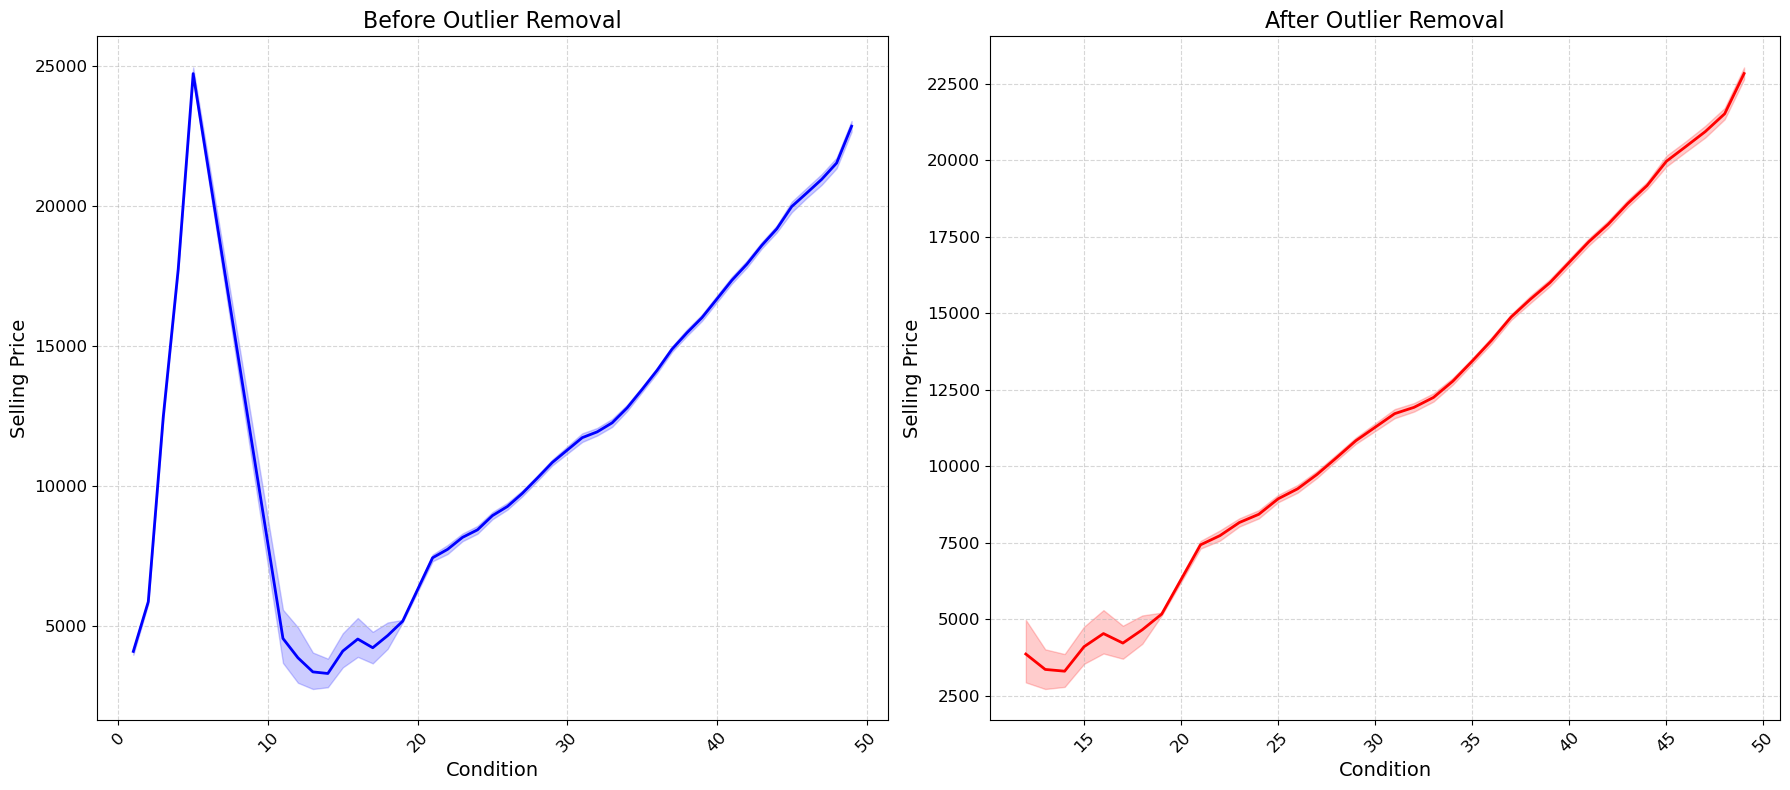

In [29]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting only the trend line using Seaborn - Before Outlier Removal
sns.lineplot(data=df, x='condition', y='sellingprice', estimator='mean', color='blue', linewidth=2, ax=axes[0])
axes[0].set_title('Before Outlier Removal', fontsize=16)
axes[0].set_xlabel('Condition', fontsize=14)
axes[0].set_ylabel('Selling Price', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)  # Rotate x-axis labels for better readability
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)  # Add grid for better visualization

# Plotting only the trend line using Seaborn - After Outlier Removal
sns.lineplot(data=df_no_outliers, x='condition', y='sellingprice', estimator='mean', color='red', linewidth=2, ax=axes[1])
axes[1].set_title('After Outlier Removal', fontsize=16)
axes[1].set_xlabel('Condition', fontsize=14)
axes[1].set_ylabel('Selling Price', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)  # Rotate x-axis labels for better readability
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)  # Add grid for better visualization

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [22]:
df = df.drop(df[df['condition'] < 12].index)

## Odometer - Selling price relation

/var/folders/9_/q1c_jd515455wxbz_xv4xn2h0000gn/T/ipykernel_43067/1982433812.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sellingprice_thousands'] = df_filtered['sellingprice'] / 1000


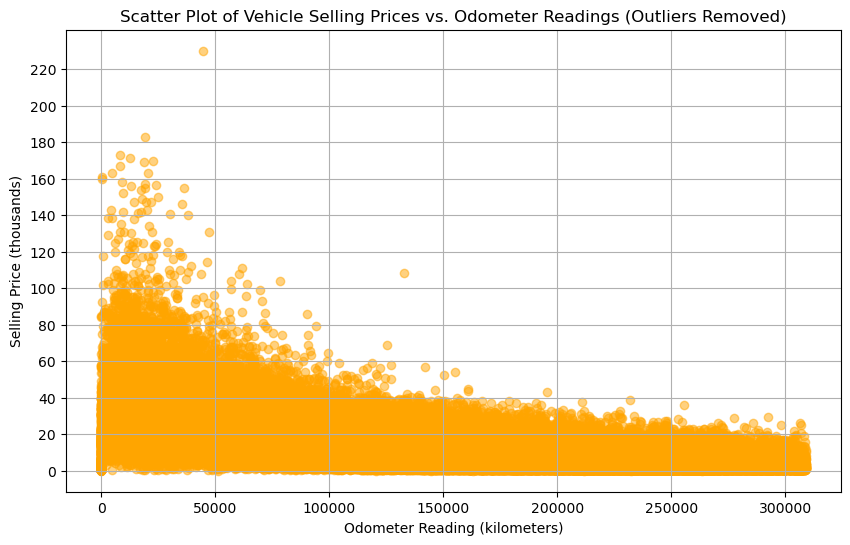

In [23]:
# Outlier removal
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['odometer'] >= lower_bound) & (df['odometer'] <= upper_bound)]

# Divide selling prices by thousands
df_filtered['sellingprice_thousands'] = df_filtered['sellingprice'] / 1000

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['odometer'], df_filtered['sellingprice_thousands'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Vehicle Selling Prices vs. Odometer Readings (Outliers Removed)')
plt.xlabel('Odometer Reading (kilometers)')
plt.ylabel('Selling Price (thousands)')
plt.yticks(range(0, int(df_filtered['sellingprice_thousands'].max()) + 1, 20))
plt.grid(True)
plt.show()

## Highest sales of cars from 2001 to 2024

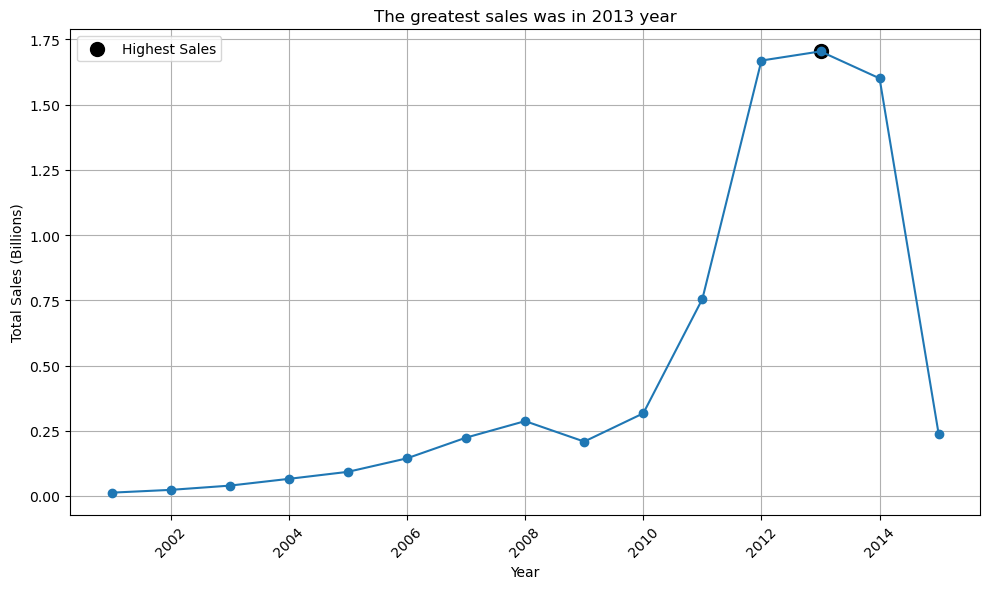

In [30]:
yearly_sales = df.groupby('year')['sellingprice'].sum().reset_index().tail(15)
highest_sales = yearly_sales.loc[yearly_sales['sellingprice'].idxmax()]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['year'], yearly_sales['sellingprice'] / 1e9, marker='o', linestyle='-')  # Divide by 1 billion
plt.scatter(highest_sales['year'], highest_sales['sellingprice'] / 1e9, color='black', s=100, label='Highest Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales (Billions)')  # Update y-axis label
plt.title('The greatest sales was in 2013 year')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Total Sales by Make 

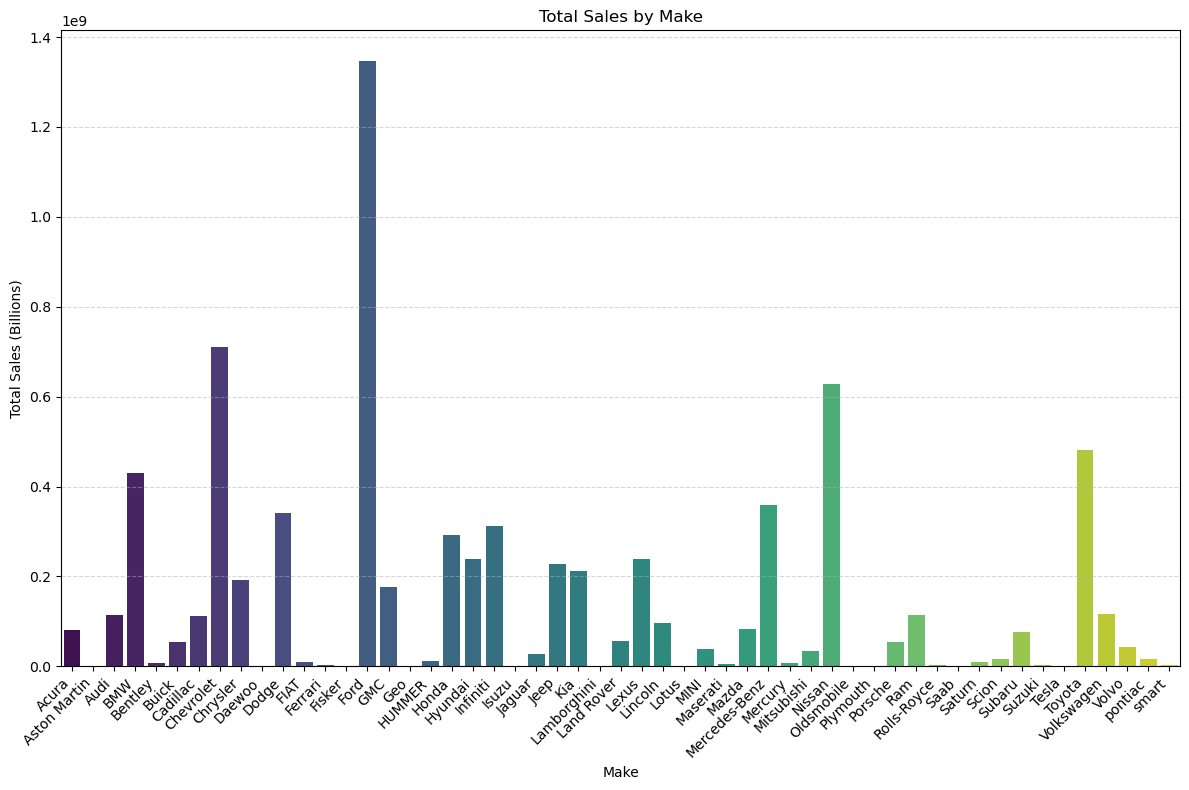

In [31]:
make_sales = df.groupby('make')['sellingprice'].sum().reset_index()
highest_sales = make_sales.nlargest(1, 'sellingprice').iloc[0]  # Find the make with the highest sales

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=make_sales, x='make', y='sellingprice', palette='viridis')
plt.xlabel('Make')
plt.ylabel('Total Sales (Billions)')
plt.title('Total Sales by Make')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Manufucaturer distributions of Body types

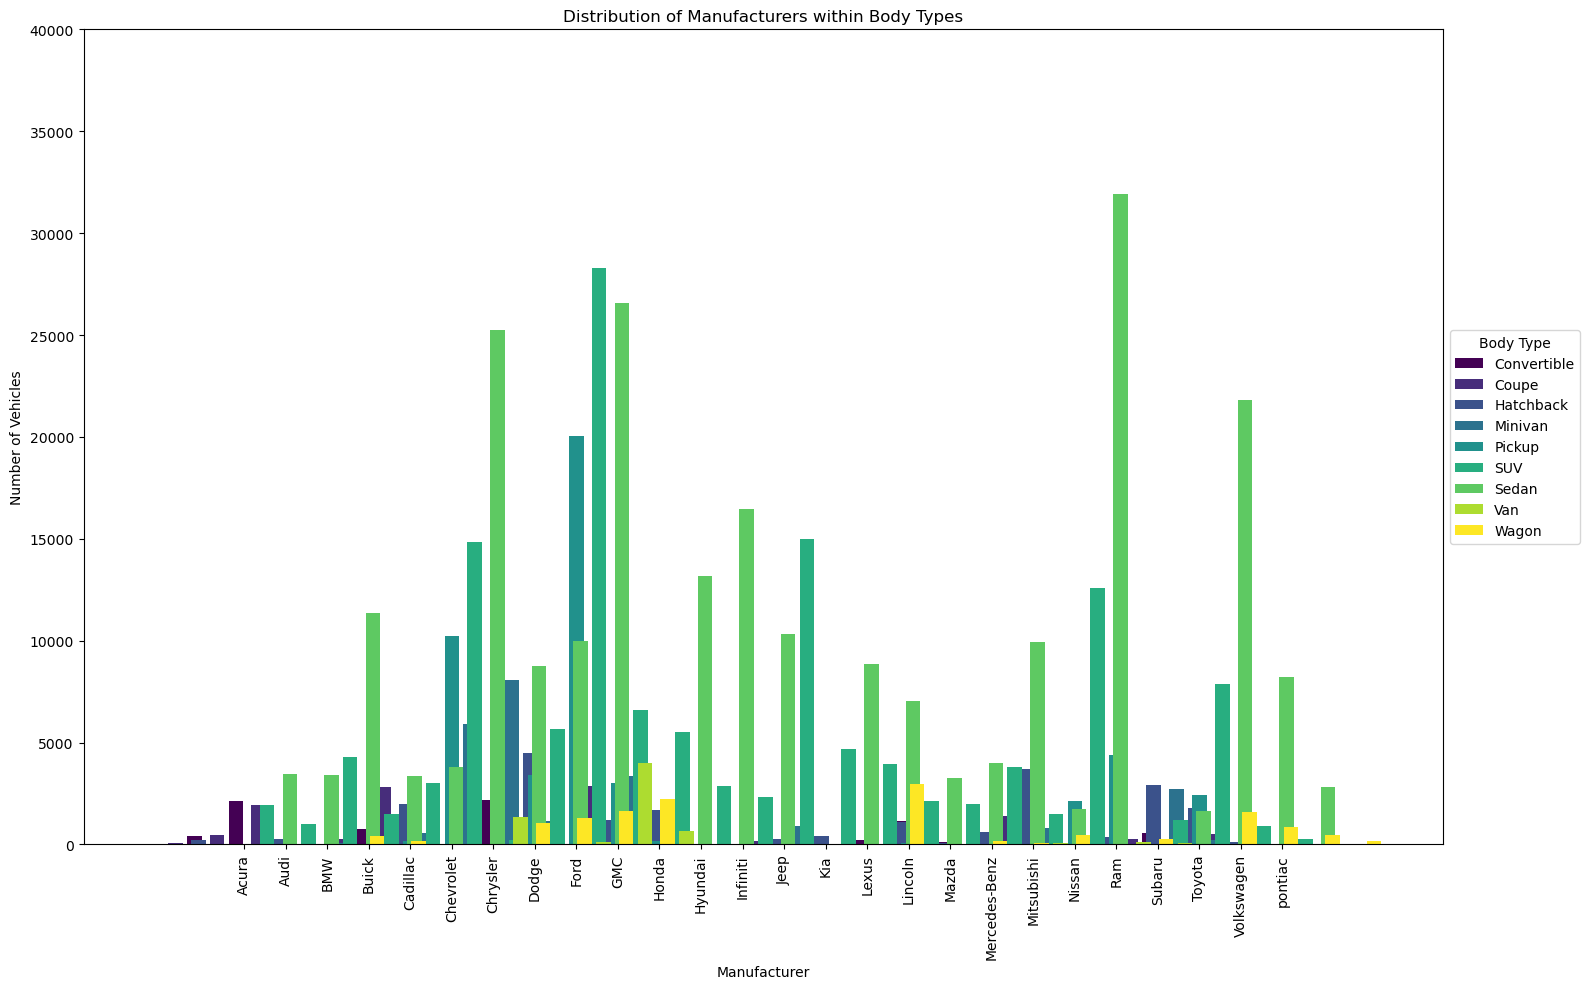

In [32]:
body_distribution = df.groupby(['make', 'body']).size().unstack(fill_value=0)

manufacturer_counts = df['make'].value_counts()

# Filter out manufacturers who sold less than 3000 cars
manufacturers_over_4000 = manufacturer_counts[manufacturer_counts >= 4000].index

# Filter the original DataFrame to keep only the rows with manufacturers who sold over 3000 cars
df_filtered = df[df['make'].isin(manufacturers_over_4000)]

# Calculate the distribution after filtering
body_distribution_filtered = df_filtered.groupby(['make', 'body']).size().unstack(fill_value=0)

# Calculate the number of body types
num_body_types = len(body_distribution_filtered.columns)


# Calculate the number of body types
num_body_types = len(body_distribution_filtered.columns)

# Set the width of the bars
bar_width = 0.35

# Define the x positions for each group
x = np.arange(len(body_distribution_filtered.index))

# Get a list of colors using the Viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, num_body_types))

# Plotting the distribution with dodge positioning and Viridis colors
fig, ax = plt.subplots(figsize=(16, 10))

for i, (body_type, data) in enumerate(body_distribution_filtered.items()):
    ax.bar(x + i * (bar_width + 0.2), data, width=bar_width, label=body_type, color=colors[i])  # Set color for each bar

plt.title('Distribution of Manufacturers within Body Types')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')

# Set y-axis limit to 40,000
plt.ylim(0, 40000)

# Set x-axis ticks and labels with rotation
plt.xticks(x + (num_body_types - 1) * (bar_width + 0.2) / 2, body_distribution_filtered.index, rotation=90, ha='center')

# Add legend
plt.legend(title='Body Type', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Best Seller Model For Each Make

In [33]:
df['revenue'] = df['sellingprice']

# Group by 'make' and 'model', and sum the revenue to find total revenue for each model within each make
make_model_revenue = df.groupby(['make', 'model'])['revenue'].sum()

# For each make, identify the model that generated the highest revenue and its revenue percentage
most_revenue_models = make_model_revenue.groupby('make').apply(lambda x: x.idxmax()[1])
revenue_percentage = make_model_revenue.groupby('make').apply(lambda x: np.ceil(x.max() / x.sum() * 100 / 10) * 10)  # Round up to nearest tens

# Combine the model and revenue percentage into a DataFrame
result = pd.DataFrame({'Model': most_revenue_models.values, 'Revenue Percentage': revenue_percentage.values}, index=most_revenue_models.index)

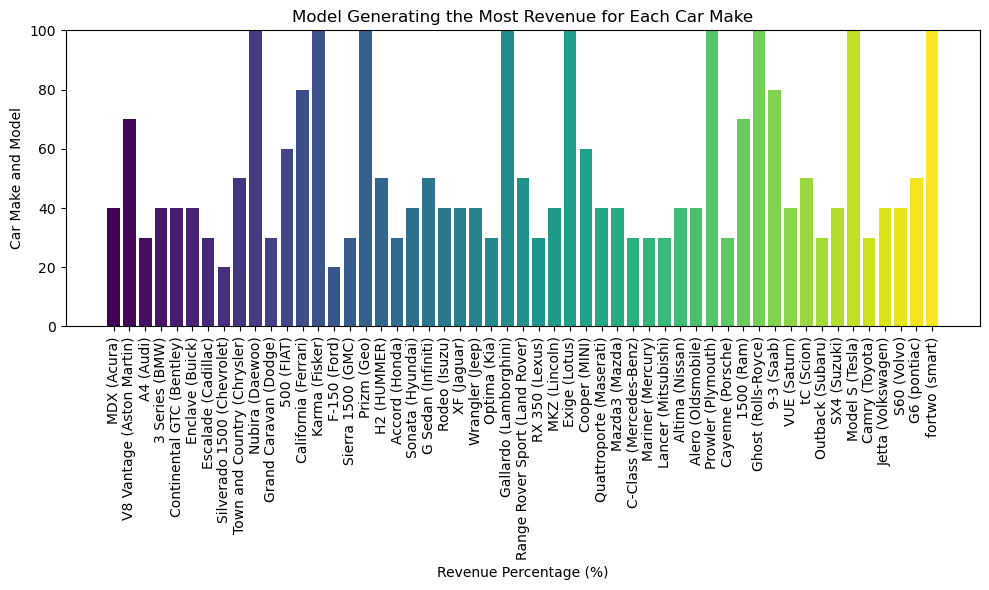

In [34]:
colors = plt.cm.viridis(np.linspace(0, 1, len(result)))

# Plotting the bar chart with the Viridis color palette
plt.figure(figsize=(10, 6))
bars = plt.bar(result['Model'] + ' (' + result.index + ')', result['Revenue Percentage'], color=colors)
plt.ylabel('Car Make and Model')  # Changed y-axis label
plt.xlabel('Revenue Percentage (%)')  # Changed x-axis label
plt.title('Model Generating the Most Revenue for Each Car Make')
plt.ylim(0, 100)  # Set y-axis limit to ensure all bars are visible
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()